<b><h1>1.	Comprensión del negocio: </h1></b>

Una tienda por departamento necesita conocer cuántos productos van a requerir cada inicio de semana, tomando como referencia las ventas en cada uno de sus departamentos, para de esta manera poder solicitar una cantidad específica de productos a sus proveedores, y éstos a su vez podrán cubrir nuestro pedido de manera oportuna y eficiente.

<b><h1>2.	Comprensión de los datos </h1></b>

In [174]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [175]:
df=pd.read_csv('Ventas.csv')
df.head(5)

,Tienda,Fecha_venta,Dia_feriado,Temperatura,Costo_combustible,Indice_price_consumidor,Venta_por_semana
0,1,05/02/2010,0,42.31,2.572,211.096358,1643690.90
1,1,12/02/2010,1,38.51,2.548,211.242170,1641957.44
2,1,19/02/2010,0,39.93,2.514,211.289143,1611968.17
3,1,26/02/2010,0,46.63,2.561,211.319643,1409727.59
4,1,05/03/2010,0,46.50,2.625,211.350143,1554806.68


In [176]:
print("-----------------------------------------------------------------\n", df.columns)
print("-----------------------------------------------------------------\n", df.shape)
print("-----------------------------------------------------------------\n", df.describe())
print("-----------------------------------------------------------------\n", df.info())
print("-----------------------------------------------------------------\n", df.nunique())
print("-----------------------------------------------------------------\n", df.isnull().sum())

-----------------------------------------------------------------
 Index(['Tienda', 'Fecha_venta', 'Dia_feriado', 'Temperatura',
       'Costo_combustible', 'Indice_price_consumidor', 'Venta_por_semana'],
      dtype='object')
-----------------------------------------------------------------
 (3432, 7)
-----------------------------------------------------------------
             Tienda  Dia_feriado  Temperatura  Costo_combustible  \
count  3432.000000  3432.000000  3428.000000        3432.000000   
mean     12.500000     0.075758    59.706683           3.337601   
std       6.923195     0.309334    18.732981           0.489448   
min       1.000000    -1.000000    -2.060000          -1.000000   
25%       6.750000     0.000000    46.395000           2.910000   
50%      12.500000     0.000000    61.965000           3.417000   
75%      18.250000     0.000000    74.175000           3.721250   
max      24.000000     7.000000    99.220000           4.468000   

       Indice_price_consu

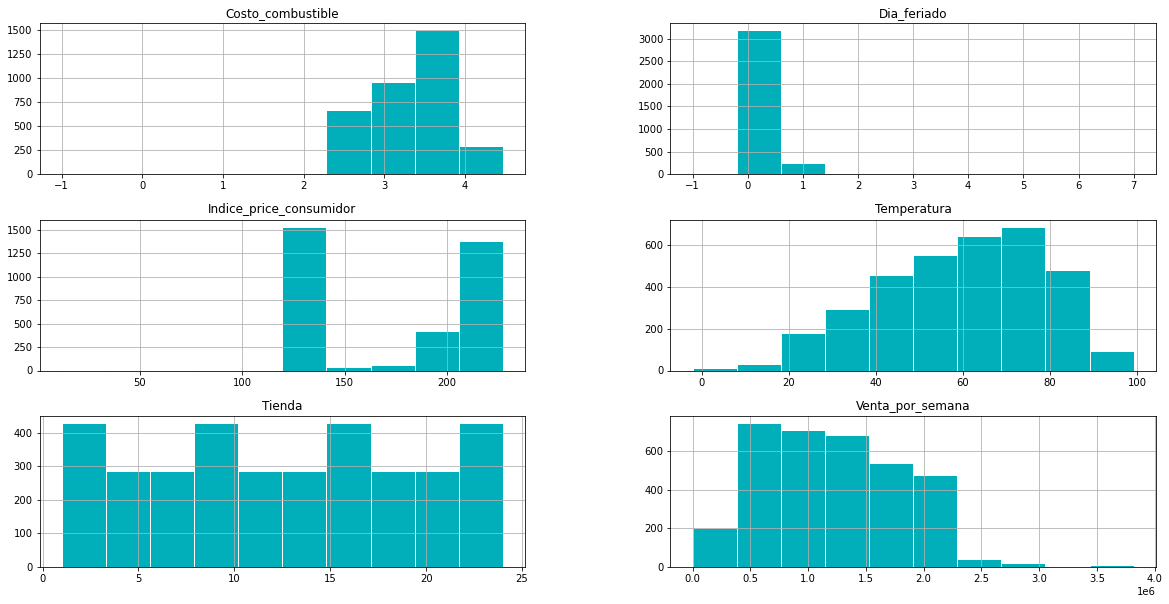

In [177]:
df.hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()

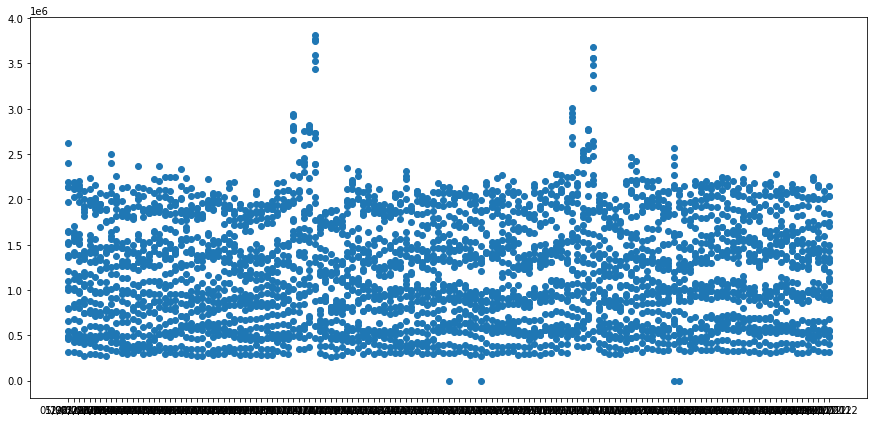

In [178]:
plt.scatter(df['Fecha_venta'],df['Venta_por_semana'])
plt.gcf().set_size_inches(15, 7)
plt.show()

<b><h1>3.	Preparación de los datos </h1></b>

In [179]:
df['Fecha_venta'] = df['Fecha_venta'].map(lambda x: datetime.strptime(x,'%d/%m/%Y'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Tienda                   3432 non-null   int64         
 1   Fecha_venta              3432 non-null   datetime64[ns]
 2   Dia_feriado              3432 non-null   int64         
 3   Temperatura              3428 non-null   float64       
 4   Costo_combustible        3432 non-null   float64       
 5   Indice_price_consumidor  3432 non-null   float64       
 6   Venta_por_semana         3432 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 187.8 KB


In [180]:
df=df.dropna()
print(df.isnull().sum())
print(df.info())
df.reset_index(inplace=True, drop=True)

Tienda                     0
Fecha_venta                0
Dia_feriado                0
Temperatura                0
Costo_combustible          0
Indice_price_consumidor    0
Venta_por_semana           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 0 to 3431
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Tienda                   3428 non-null   int64         
 1   Fecha_venta              3428 non-null   datetime64[ns]
 2   Dia_feriado              3428 non-null   int64         
 3   Temperatura              3428 non-null   float64       
 4   Costo_combustible        3428 non-null   float64       
 5   Indice_price_consumidor  3428 non-null   float64       
 6   Venta_por_semana         3428 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 214.2 KB
None


In [181]:
df['Año'] = df['Fecha_venta'].dt.year 
df['mes'] = df['Fecha_venta'].dt.month 
df['dia'] = df['Fecha_venta'].dt.day 

df.head()

,Tienda,Fecha_venta,Dia_feriado,Temperatura,Costo_combustible,Indice_price_consumidor,Venta_por_semana,Año,mes,dia
0,1,2010-02-05,0,42.31,2.572,211.096358,1643690.90,2010,2,5
1,1,2010-02-12,1,38.51,2.548,211.242170,1641957.44,2010,2,12
2,1,2010-02-19,0,39.93,2.514,211.289143,1611968.17,2010,2,19
3,1,2010-02-26,0,46.63,2.561,211.319643,1409727.59,2010,2,26
4,1,2010-03-05,0,46.50,2.625,211.350143,1554806.68,2010,3,5


<b><h1>4.	Modelado:  </h1></b>

In [182]:
corr=df.corr(method='spearman')
corr

,Tienda,Dia_feriado,Temperatura,Costo_combustible,Indice_price_consumidor,Venta_por_semana,Año,mes,dia
Tienda,1.000000,-0.007753,-0.274476,0.207559,-0.381578,0.028634,0.001244,0.000172,0.000021
Dia_feriado,-0.007753,1.000000,-0.134155,-0.079435,0.003341,0.036051,-0.057829,0.113736,0.044533
Temperatura,-0.274476,-0.134155,1.000000,0.106376,0.247543,0.018615,0.065244,0.239605,0.026247
Costo_combustible,0.207559,-0.079435,0.106376,1.000000,-0.023190,0.057065,0.755134,-0.046990,0.032651
Indice_price_consumidor,-0.381578,0.003341,0.247543,-0.023190,1.000000,-0.294626,0.242270,0.019849,0.009973
Venta_por_semana,0.028634,0.036051,0.018615,0.057065,-0.294626,1.000000,-0.012413,0.062287,-0.029186
Año,0.001244,-0.057829,0.065244,0.755134,0.242270,-0.012413,1.000000,-0.188058,0.006755
mes,0.000172,0.113736,0.239605,-0.046990,0.019849,0.062287,-0.188058,1.000000,0.014051
dia,0.000021,0.044533,0.026247,0.032651,0.009973,-0.029186,0.006755,0.014051,1.000000


In [183]:
corr_test = pearsonr(x = df['dia'], y =  df['Venta_por_semana'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.016435214946910828
P-value:  0.33605891037097835


In [184]:
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import pylab as pl
%matplotlib inline 

In [188]:
df.columns

Index(['Tienda', 'Fecha_venta', 'Dia_feriado', 'Temperatura',
       'Costo_combustible', 'Indice_price_consumidor', 'Venta_por_semana',
       'Año', 'mes', 'dia'],
      dtype='object')

In [192]:
X = np.asarray(df[['Tienda','Dia_feriado', 'Temperatura',
                   'Costo_combustible', 'Indice_price_consumidor', 'Venta_por_semana']])

In [191]:
y= np.asarray(df['dia'])

In [194]:
from sklearn import preprocessing

In [195]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2742, 6) (2742,)
Test set: (686, 6) (686,)


In [198]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)
yhat = LR.predict(X_test)


In [200]:
yhat_prob = LR.predict_proba(X_test)

<b><h1>5.	Evaluación  </h1></b>


In [204]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        31
           3       0.07      0.11      0.09        28
           4       0.09      0.30      0.14        23
           5       0.04      0.04      0.04        24
           6       0.02      0.19      0.04        16
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00        22
          10       0.27      0.41      0.32        27
          11       1.00      0.11      0.20        18
          12       0.00      0.00      0.00        21
          13       0.03      0.08      0.04        24
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        24
          16       0.07      0.05      0.06        21
          17       0.00      0.00      0.00        31
          18       0.00    

C:\Users\MARELLY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [205]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

3.3956923503377223